In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import skew, kurtosis, zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in data from Airline Delays.XLS
df = pd.read_excel('/Users/helenamabey/Downloads/Airline Delays.XLS')
# Used .head() to limit returns for ease of viewing
df.head()

,Airline,Month,Day,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),...,Max Temp\r\n(Destination),Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
0,AA,1,1,DFW,10,-8.200000,20.000000,41.7,15.4,1014.6,...,75.9,57.0,41.0,25.0,55.8,38.4,0.00,0.00,0.0,0.0
1,AA,1,2,DFW,12,12.250000,41.666667,60.8,19.5,1010.5,...,73.4,52.0,64.4,17.1,67.7,32.4,0.03,0.03,0.0,0.0
2,AA,1,3,DFW,12,5.166667,50.000000,42.4,15.9,1008.0,...,73.0,42.1,53.1,17.1,62.1,26.0,0.02,0.06,0.0,1.2
3,AA,1,4,DFW,12,-4.833333,41.666667,23.4,6.5,1026.1,...,70.0,46.9,33.1,8.1,42.9,25.2,0.00,0.03,0.0,0.0
4,AA,1,5,DFW,12,-9.500000,8.333333,17.8,17.2,1027.6,...,52.0,46.9,28.0,14.0,36.6,35.4,0.00,0.00,0.0,0.0


In [5]:
# Obtain data types and other relevent information from the date frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Airline                          2562 non-null   object 
 1   Month                            2562 non-null   int64  
 2   Day                              2562 non-null   int64  
 3   Destination                      2562 non-null   object 
 4   Number of Flights                2562 non-null   int64  
 5   Delay                            2561 non-null   float64
 6   % Late Flights                   2561 non-null   float64
 7    Dew Point (Destination)         2562 non-null   float64
 8   Dew Point (DIA)                  2562 non-null   float64
 9   Pressure (Destination)           2562 non-null   float64
 10  Pressure (DIA)                   2562 non-null   float64
 11  Visibility (Destination)         2562 non-null   float64
 12  Visability (DIA)
   

In [7]:
# Obtain statistical summary of the data frame
df.describe()

,Month,Day,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),Visibility (Destination),...,Max Temp\r\n(Destination),Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
count,2562.000000,2562.000000,2562.000000,2561.000000,2561.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,...,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2442.000000,2401.000000,2562.000000,2562.000000
mean,6.513661,15.756831,7.651835,14.125567,56.491759,48.190398,30.466667,1017.455582,1013.807104,9.031928,...,72.639266,95.771311,50.421155,35.681421,60.892779,50.877596,0.094832,0.048717,0.312412,0.106557
std,3.451908,8.813250,3.897528,24.730657,30.344543,17.214108,13.418570,6.409037,7.068772,1.534389,...,19.578336,518.871002,18.355213,16.752769,18.871194,18.295813,0.269406,0.161274,1.710558,0.438239
min,1.000000,1.000000,0.000000,-21.600000,0.000000,-10.200000,1.200000,994.600000,992.900000,1.900000,...,6.800000,19.400000,-9.400000,-0.900000,-2.800000,7.400000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,5.000000,-1.142857,33.333333,34.900000,19.100000,1013.400000,1008.900000,8.500000,...,61.000000,54.000000,37.000000,22.100000,48.000000,35.600000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,16.000000,7.000000,7.000000,57.142857,51.600000,29.450000,1016.600000,1013.700000,9.800000,...,75.900000,68.000000,53.100000,34.000000,63.800000,49.300000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,23.000000,10.750000,22.000000,80.000000,63.300000,41.600000,1021.500000,1018.700000,10.000000,...,87.100000,87.800000,66.000000,53.100000,75.000000,67.800000,0.040000,0.030000,0.000000,0.000000
max,12.000000,31.000000,19.000000,233.000000,100.000000,72.900000,60.300000,1040.700000,1032.700000,10.000000,...,111.000000,9999.900000,82.000000,68.000000,96.600000,84.300000,2.200000,1.940000,18.100000,3.900000


#### Overall data file analysis

The original data contains many details regarding number of flights, minutes of delay, percentage delayed per day per airline, and multiplwe weather statistics. This data also contains information about flights with a destination outside of Chicago. The requested problem to be analyzed was regarding only those flights starting at DIA and ending in Chicago. Though the full dataset does provide valuable information, it needs to be parsed down to include only flights that meet the given criteria. 

#### Data Cleaning

In order to make the data more useful, a combined date field needs to be established. The original data only contained the numberic month and numeric day, both as integer columns. Knowing all the flights in this dataset were in 2000, the following code created a single datetime column, moved that to the first column, then removed the numeric month and day columns.

In [11]:
# Create full date column
df['Date'] = pd.to_datetime({'year': 2000, 'month': df['Month'], 'day': df['Day']})
df.head(10)

,Airline,Month,Day,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),...,Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA),Date
0,AA,1,1,DFW,10,-8.200000,20.000000,41.7,15.4,1014.6,...,57.0,41.0,25.0,55.8,38.4,0.00,0.00,0.0,0.0,2000-01-01
1,AA,1,2,DFW,12,12.250000,41.666667,60.8,19.5,1010.5,...,52.0,64.4,17.1,67.7,32.4,0.03,0.03,0.0,0.0,2000-01-02
2,AA,1,3,DFW,12,5.166667,50.000000,42.4,15.9,1008.0,...,42.1,53.1,17.1,62.1,26.0,0.02,0.06,0.0,1.2,2000-01-03
3,AA,1,4,DFW,12,-4.833333,41.666667,23.4,6.5,1026.1,...,46.9,33.1,8.1,42.9,25.2,0.00,0.03,0.0,0.0,2000-01-04
4,AA,1,5,DFW,12,-9.500000,8.333333,17.8,17.2,1027.6,...,46.9,28.0,14.0,36.6,35.4,0.00,0.00,0.0,0.0,2000-01-05
5,AA,1,6,DFW,12,-5.666667,16.666667,29.0,5.3,1022.3,...,43.0,28.2,17.1,48.7,26.0,0.00,0.00,0.0,0.0,2000-01-06
6,AA,1,7,DFW,12,-6.083333,33.333333,43.6,6.0,1027.9,...,46.4,36.0,21.2,52.9,30.3,0.00,0.00,0.0,0.0,2000-01-07
7,AA,1,8,DFW,11,-14.272727,9.090909,46.9,10.9,1020.6,...,48.2,48.0,24.8,50.2,35.2,0.80,0.00,0.0,0.0,2000-01-08
8,AA,1,9,DFW,12,-10.083333,16.666667,38.9,6.6,1009.6,...,48.0,42.8,24.3,54.0,35.6,0.00,0.00,0.0,0.0,2000-01-09
9,AA,1,10,DFW,12,-11.416667,8.333333,24.6,14.0,1010.3,...,46.4,42.8,26.6,56.8,35.2,0.00,0.00,0.0,0.0,2000-01-10


In [31]:
# Move date to first column
df.insert(0, 'Date', df.pop('Date'))

In [33]:
df['Date'].tail(10)

2552   2000-12-22
2553   2000-12-23
2554   2000-12-24
2555   2000-12-25
2556   2000-12-26
2557   2000-12-27
2558   2000-12-28
2559   2000-12-29
2560   2000-12-30
2561   2000-12-31
Name: Date, dtype: datetime64[ns]

In [27]:
# Remove white space in Destination column
df['Destination'] = df['Destination'].str.strip()

In [39]:
# Remove Month column, handled by full date column
filtered_df.pop('Month') 
filtered_df.head()

,Date,Airline,Day,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),...,Max Temp\r\n(Destination),Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
366,2000-01-01,AA,1,ORD,5,-21.600000,0.000000,29.4,15.4,1015.7,...,48.0,57.0,26.1,25.0,38.5,38.4,0.00,0.00,0.0,0.0
367,2000-01-02,AA,2,ORD,7,23.000000,57.142857,42.2,19.5,1006.4,...,60.8,52.0,37.4,17.1,47.7,32.4,0.01,0.03,0.0,0.0
368,2000-01-03,AA,3,ORD,7,63.857143,100.000000,34.3,15.9,1010.9,...,42.1,42.1,35.6,17.1,37.4,26.0,0.01,0.06,0.0,1.2
369,2000-01-04,AA,4,ORD,7,5.142857,57.142857,25.9,6.5,1008.9,...,37.9,46.9,26.1,8.1,29.8,25.2,0.25,0.03,1.2,0.0
370,2000-01-05,AA,5,ORD,7,-14.571429,0.000000,15.7,17.2,1025.1,...,26.1,46.9,12.2,14.0,19.5,35.4,0.08,0.00,0.0,0.0


In [41]:
# Remove Day column, handled by full date column
filtered_df.pop('Day') 
filtered_df.head()

,Date,Airline,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
366,2000-01-01,AA,ORD,5,-21.600000,0.000000,29.4,15.4,1015.7,1005.0,...,48.0,57.0,26.1,25.0,38.5,38.4,0.00,0.00,0.0,0.0
367,2000-01-02,AA,ORD,7,23.000000,57.142857,42.2,19.5,1006.4,1004.8,...,60.8,52.0,37.4,17.1,47.7,32.4,0.01,0.03,0.0,0.0
368,2000-01-03,AA,ORD,7,63.857143,100.000000,34.3,15.9,1010.9,1015.1,...,42.1,42.1,35.6,17.1,37.4,26.0,0.01,0.06,0.0,1.2
369,2000-01-04,AA,ORD,7,5.142857,57.142857,25.9,6.5,1008.9,1023.6,...,37.9,46.9,26.1,8.1,29.8,25.2,0.25,0.03,1.2,0.0
370,2000-01-05,AA,ORD,7,-14.571429,0.000000,15.7,17.2,1025.1,1011.7,...,26.1,46.9,12.2,14.0,19.5,35.4,0.08,0.00,0.0,0.0


#### Create Chicago only destination data frame

As stated above, this dataset contained information on destinations outside of Chicago. Because they are not part of this analysis, a second data frame was created to filter to only flights with a destination of 'ORD' (Chicago). 

---

After the Chicago only data frame was complete and prior to running summary statistics, the nulls needed to be accounted for. Nulls were replaced with 0 as to not prevent calculations. Running an information query shows that all columns contain the same number of non-null values.

In [35]:
# Filter to only Chicago destinations
filtered_df = df[df['Destination'] == 'ORD']
filtered_df.head()

,Date,Airline,Month,Day,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
366,2000-01-01,AA,1,1,ORD,5,-21.600000,0.000000,29.4,15.4,...,48.0,57.0,26.1,25.0,38.5,38.4,0.00,0.00,0.0,0.0
367,2000-01-02,AA,1,2,ORD,7,23.000000,57.142857,42.2,19.5,...,60.8,52.0,37.4,17.1,47.7,32.4,0.01,0.03,0.0,0.0
368,2000-01-03,AA,1,3,ORD,7,63.857143,100.000000,34.3,15.9,...,42.1,42.1,35.6,17.1,37.4,26.0,0.01,0.06,0.0,1.2
369,2000-01-04,AA,1,4,ORD,7,5.142857,57.142857,25.9,6.5,...,37.9,46.9,26.1,8.1,29.8,25.2,0.25,0.03,1.2,0.0
370,2000-01-05,AA,1,5,ORD,7,-14.571429,0.000000,15.7,17.2,...,26.1,46.9,12.2,14.0,19.5,35.4,0.08,0.00,0.0,0.0


In [43]:
# Null handling
filtered_df = filtered_df.fillna(0)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 366 to 2561
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             732 non-null    datetime64[ns]
 1   Airline                          732 non-null    object        
 2   Destination                      732 non-null    object        
 3   Number of Flights                732 non-null    int64         
 4   Delay                            732 non-null    float64       
 5   % Late Flights                   732 non-null    float64       
 6    Dew Point (Destination)         732 non-null    float64       
 7   Dew Point (DIA)                  732 non-null    float64       
 8   Pressure (Destination)           732 non-null    float64       
 9   Pressure (DIA)                   732 non-null    float64       
 10  Visibility (Destination)         732 non-null    float64       


In [45]:
filtered_df.describe()

,Date,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),Visibility (Destination),Visability (DIA)\r\n,...,Max Temp\r\n(Destination),Max Temp (DIA)\r\n,Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
count,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,...,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.00000,732.000000,732.000000,732.000000
mean,2000-07-01 12:00:00,10.449454,17.564979,57.359153,40.152732,30.466667,1017.282787,1013.807104,8.638525,9.462295,...,61.258197,95.771311,40.323497,35.681421,50.323770,50.877596,0.07112,0.045656,1.076503,0.106557
min,2000-01-01 00:00:00,0.000000,-21.600000,0.000000,-10.200000,1.200000,994.600000,992.900000,2.200000,2.000000,...,6.800000,19.400000,-9.400000,-0.900000,-2.800000,7.400000,0.00000,0.000000,0.000000,0.000000
25%,2000-04-01 00:00:00,7.000000,-0.446429,36.363636,25.200000,19.100000,1012.800000,1008.900000,7.900000,9.800000,...,42.800000,54.000000,27.000000,22.100000,34.300000,35.600000,0.00000,0.000000,0.000000,0.000000
50%,2000-07-01 12:00:00,7.000000,9.347619,57.142857,41.400000,29.450000,1017.050000,1013.700000,9.400000,10.000000,...,64.900000,68.000000,42.900000,34.000000,52.850000,49.300000,0.01000,0.000000,0.000000,0.000000
75%,2000-10-01 00:00:00,15.000000,28.116071,80.000000,55.900000,41.600000,1021.700000,1018.700000,10.000000,10.000000,...,79.000000,87.800000,55.400000,53.100000,67.400000,67.800000,0.06000,0.030000,0.000000,0.000000
max,2000-12-31 00:00:00,19.000000,233.000000,100.000000,71.700000,60.300000,1040.700000,1032.700000,10.000000,10.000000,...,93.200000,9999.900000,71.600000,68.000000,82.200000,84.300000,1.86000,1.940000,18.100000,3.900000
std,NaN,4.122795,28.264177,27.453347,18.769302,13.425124,7.213686,7.072225,1.803392,1.308438,...,20.764728,519.124443,18.922092,16.760952,19.657237,18.304749,0.18034,0.156646,3.067235,0.438454


In [230]:
# Filter to only United Airlines
united_df = filtered_df[filtered_df['Airline'] == 'UA']
united_df.head()

,Date,Airline,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA),Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
2196,2000-01-01,UA,ORD,15,-16.066667,6.666667,29.4,15.4,1015.7,1005.0,...,48.0,57.0,26.1,25.0,38.5,38.4,0.00,0.00,0.0,0.0
2197,2000-01-02,UA,ORD,16,25.062500,62.500000,42.2,19.5,1006.4,1004.8,...,60.8,52.0,37.4,17.1,47.7,32.4,0.01,0.03,0.0,0.0
2198,2000-01-03,UA,ORD,19,53.473684,84.210526,34.3,15.9,1010.9,1015.1,...,42.1,42.1,35.6,17.1,37.4,26.0,0.01,0.06,0.0,1.2
2199,2000-01-04,UA,ORD,18,11.388889,72.222222,25.9,6.5,1008.9,1023.6,...,37.9,46.9,26.1,8.1,29.8,25.2,0.25,0.03,1.2,0.0
2200,2000-01-05,UA,ORD,15,23.533333,26.666667,15.7,17.2,1025.1,1011.7,...,26.1,46.9,12.2,14.0,19.5,35.4,0.08,0.00,0.0,0.0


In [342]:
united_df.describe()

,Date,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),Visibility (Destination),Visability (DIA),...,Max Temp (DIA),Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA),Z-Score
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,2000-07-01 12:00:00,14.314208,22.122451,62.731577,40.152732,30.466667,1017.282787,1013.807104,8.638525,9.462295,...,95.771311,40.323497,35.681421,50.323770,50.877596,0.071120,0.045656,1.076503,0.106557,-3.882747e-17
min,2000-01-01 00:00:00,2.000000,-16.066667,0.000000,-10.200000,1.200000,994.600000,992.900000,2.200000,2.000000,...,19.400000,-9.400000,-0.900000,-2.800000,7.400000,0.000000,0.000000,0.000000,0.000000,-2.544187e+00
25%,2000-04-01 06:00:00,13.000000,4.737500,45.629371,25.250000,19.100000,1012.825000,1008.950000,7.925000,9.825000,...,54.000000,27.025000,22.325000,34.450000,35.650000,0.000000,0.000000,0.000000,0.000000,-6.936093e-01
50%,2000-07-01 12:00:00,15.000000,14.248718,64.285714,41.400000,29.450000,1017.050000,1013.700000,9.400000,10.000000,...,68.000000,42.900000,34.000000,52.850000,49.300000,0.010000,0.000000,0.000000,0.000000,6.303071e-02
75%,2000-09-30 18:00:00,16.000000,32.136364,82.352941,55.875000,41.600000,1021.700000,1018.675000,10.000000,10.000000,...,87.800000,55.400000,53.100000,67.325000,67.750000,0.060000,0.030000,0.000000,0.000000,7.957780e-01
max,2000-12-31 00:00:00,19.000000,179.400000,100.000000,71.700000,60.300000,1040.700000,1032.700000,10.000000,10.000000,...,9999.900000,71.600000,68.000000,82.200000,84.300000,1.860000,1.940000,18.100000,3.900000,1.511485e+00
std,NaN,1.848262,26.776391,24.690584,18.782154,13.434316,7.218625,7.077067,1.804626,1.309334,...,519.479886,18.935048,16.772428,19.670696,18.317283,0.180464,0.156753,3.069335,0.438754,1.001369e+00


In [432]:
summary_stats = united_df["% Late Flights"].agg(["count", "min", "max", "mean", "median", "std", "var", "skew", "kurt"])
summary_stats_2 = united_df["Delay"].agg(["count", "min", "max", "mean", "median", "std", "var", "skew", "kurt"])
print(summary_stats)
print()
print(summary_stats_2)

count     366.000000
min         0.000000
max       100.000000
mean       62.731577
median     64.285714
std        24.690584
var       609.624949
skew       -0.348009
kurt       -0.807596
Name: % Late Flights, dtype: float64

count     366.000000
min       -16.066667
max       179.400000
mean       22.122451
median     14.248718
std        26.776391
var       716.975126
skew        1.970956
kurt        5.722543
Name: Delay, dtype: float64


In [232]:
united_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2196 to 2561
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           366 non-null    datetime64[ns]
 1   Airline                        366 non-null    object        
 2   Destination                    366 non-null    object        
 3   Number of Flights              366 non-null    int64         
 4   Delay                          366 non-null    float64       
 5   % Late Flights                 366 non-null    float64       
 6   Dew Point (Destination)        366 non-null    float64       
 7   Dew Point (DIA)                366 non-null    float64       
 8   Pressure (Destination)         366 non-null    float64       
 9   Pressure (DIA)                 366 non-null    float64       
 10  Visibility (Destination)       366 non-null    float64       
 11  Visability (DIA)    

#### Create dataset for delayed and on time flights

In order to compare flights that were delay against those that were on time, it was useful to create independent datasets. These were created by filtering the Delay column on values greater than zero (delayed) and less than or equal to zero (on time).

In [264]:
# Filter rows where Delay is 0 or less
ontime_df = united_df[united_df['Delay'] <= 0]

# Filter rows where Delay is greater than 0
delay_df = united_df[united_df['Delay'] > 0]


In [266]:
ontime_df.head()

,Date,Airline,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA),Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
2196,2000-01-01,UA,ORD,15,-16.066667,6.666667,29.4,15.4,1015.7,1005.0,...,48.0,57.0,26.1,25.0,38.5,38.4,0.00,0.0,0.0,0.0
2202,2000-01-07,UA,ORD,14,-9.285714,21.428571,16.0,6.0,1026.7,1023.6,...,41.0,46.4,21.0,21.2,26.3,30.3,0.00,0.0,0.0,0.0
2206,2000-01-11,UA,ORD,14,-8.000000,28.571429,25.6,15.6,1005.1,1008.4,...,42.8,9999.9,30.2,17.6,36.0,33.2,0.03,0.0,0.0,0.0
2207,2000-01-12,UA,ORD,13,-3.615385,7.692308,19.5,14.6,1020.2,1006.5,...,33.8,64.0,26.6,14.0,30.2,43.9,0.00,0.0,0.0,0.0
2209,2000-01-14,UA,ORD,14,-9.714286,7.142857,12.3,12.0,1040.5,1025.2,...,26.6,62.6,10.4,26.6,19.6,41.0,0.00,0.0,0.0,0.0


In [268]:
ontime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 2196 to 2554
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           50 non-null     datetime64[ns]
 1   Airline                        50 non-null     object        
 2   Destination                    50 non-null     object        
 3   Number of Flights              50 non-null     int64         
 4   Delay                          50 non-null     float64       
 5   % Late Flights                 50 non-null     float64       
 6   Dew Point (Destination)        50 non-null     float64       
 7   Dew Point (DIA)                50 non-null     float64       
 8   Pressure (Destination)         50 non-null     float64       
 9   Pressure (DIA)                 50 non-null     float64       
 10  Visibility (Destination)       50 non-null     float64       
 11  Visability (DIA)     

In [270]:
ontime_df.describe()

,Date,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),Visibility (Destination),Visability (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA),Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
count,50,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,...,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.0
mean,2000-05-26 23:31:12,14.040000,-4.916189,23.341417,32.862000,26.92000,1020.598000,1013.23800,9.258000,9.824000,...,57.27600,266.928000,34.370000,33.432000,45.16600,49.862000,0.031000,0.006400,0.746000,0.0
min,2000-01-01 00:00:00,10.000000,-16.066667,0.000000,-3.500000,6.00000,1005.100000,1002.50000,4.000000,7.600000,...,19.90000,39.000000,-4.000000,14.000000,5.20000,26.200000,0.000000,0.000000,0.000000,0.0
25%,2000-02-10 12:00:00,13.000000,-7.766667,19.062500,21.700000,18.05000,1016.050000,1008.42500,9.025000,10.000000,...,41.45000,60.325000,22.100000,23.500000,31.60000,41.125000,0.000000,0.000000,0.000000,0.0
50%,2000-04-22 00:00:00,14.000000,-4.227679,23.076923,30.600000,26.45000,1020.150000,1012.25000,10.000000,10.000000,...,60.25000,66.100000,35.800000,33.100000,46.20000,49.150000,0.000000,0.000000,0.000000,0.0
75%,2000-09-24 06:00:00,15.000000,-1.746394,28.571429,45.800000,33.62500,1025.500000,1017.85000,10.000000,10.000000,...,70.00000,79.425000,44.775000,41.900000,56.80000,59.625000,0.010000,0.000000,0.000000,0.0
max,2000-12-24 00:00:00,16.000000,0.000000,46.666667,68.300000,49.70000,1040.500000,1032.70000,10.000000,10.000000,...,93.00000,9999.900000,66.900000,55.900000,78.80000,72.400000,0.840000,0.140000,11.800000,0.0
std,NaN,1.628321,3.859332,10.225816,17.094335,10.91537,6.904878,6.74128,1.312124,0.548676,...,20.07269,1404.603561,18.359252,11.935617,19.16805,12.811457,0.123557,0.023884,2.071893,0.0


In [272]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 2197 to 2561
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           316 non-null    datetime64[ns]
 1   Airline                        316 non-null    object        
 2   Destination                    316 non-null    object        
 3   Number of Flights              316 non-null    int64         
 4   Delay                          316 non-null    float64       
 5   % Late Flights                 316 non-null    float64       
 6   Dew Point (Destination)        316 non-null    float64       
 7   Dew Point (DIA)                316 non-null    float64       
 8   Pressure (Destination)         316 non-null    float64       
 9   Pressure (DIA)                 316 non-null    float64       
 10  Visibility (Destination)       316 non-null    float64       
 11  Visability (DIA)    

In [274]:
delay_df.head()

,Date,Airline,Destination,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA),Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
2197,2000-01-02,UA,ORD,16,25.062500,62.500000,42.2,19.5,1006.4,1004.8,...,60.8,52.0,37.4,17.1,47.7,32.4,0.01,0.03,0.0,0.0
2198,2000-01-03,UA,ORD,19,53.473684,84.210526,34.3,15.9,1010.9,1015.1,...,42.1,42.1,35.6,17.1,37.4,26.0,0.01,0.06,0.0,1.2
2199,2000-01-04,UA,ORD,18,11.388889,72.222222,25.9,6.5,1008.9,1023.6,...,37.9,46.9,26.1,8.1,29.8,25.2,0.25,0.03,1.2,0.0
2200,2000-01-05,UA,ORD,15,23.533333,26.666667,15.7,17.2,1025.1,1011.7,...,26.1,46.9,12.2,14.0,19.5,35.4,0.08,0.00,0.0,0.0
2201,2000-01-06,UA,ORD,13,3.000000,38.461538,23.9,5.3,1021.4,1024.1,...,41.0,43.0,12.9,17.1,30.2,26.0,0.00,0.00,0.0,0.0


In [276]:
delay_df.describe()

,Date,Number of Flights,Delay,% Late Flights,Dew Point (Destination),Dew Point (DIA),Pressure (Destination),Pressure (DIA),Visibility (Destination),Visability (DIA),...,Max Temp\r\n(Destination),Max Temp (DIA),Min Temp (Destination),Min Temp (DIA),Mean Temp (Destination),Mean Temp (DIA),Precipitation (Destination),Precipitation (DIA),Snow (Destination),Snow (DIA)
count,316,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,...,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,2000-07-07 02:53:09.873417728,14.357595,26.400716,68.964197,41.306329,31.027848,1016.758228,1013.897152,8.540506,9.405063,...,61.888291,68.689557,41.265506,36.037342,51.139873,51.038291,0.077468,0.051867,1.128797,0.123418
min,2000-01-02 00:00:00,2.000000,0.187500,21.428571,-10.200000,1.200000,994.600000,992.900000,2.200000,2.000000,...,6.800000,19.400000,-9.400000,-0.900000,-2.800000,7.400000,0.000000,0.000000,0.000000,0.000000
25%,2000-04-10 18:00:00,13.000000,8.550000,53.333333,26.050000,19.200000,1012.500000,1009.275000,7.700000,9.700000,...,42.950000,52.000000,28.150000,21.725000,35.625000,35.175000,0.000000,0.000000,0.000000,0.000000
50%,2000-07-06 12:00:00,15.000000,17.516667,71.428571,43.800000,30.500000,1016.200000,1013.700000,9.300000,10.000000,...,66.900000,68.000000,44.350000,35.100000,55.250000,49.300000,0.010000,0.000000,0.000000,0.000000
75%,2000-10-03 12:00:00,16.000000,34.958974,85.714286,57.100000,42.025000,1021.025000,1018.850000,10.000000,10.000000,...,80.100000,88.275000,57.050000,53.100000,67.925000,69.750000,0.070000,0.030000,0.000000,0.000000
max,2000-12-31 00:00:00,19.000000,179.400000,100.000000,71.700000,60.300000,1040.700000,1031.600000,10.000000,10.000000,...,93.200000,100.900000,71.600000,68.000000,82.200000,84.300000,1.860000,1.940000,18.100000,3.900000
std,NaN,1.879372,26.344950,20.121447,18.802560,13.721601,7.137415,7.134852,1.853441,1.384050,...,20.849650,20.277816,18.881165,17.403358,19.654787,19.054106,0.187259,0.167630,3.198178,0.470078


In [278]:
print("Skewness:", united_df["% Late Flights"].skew())
print("Kurtosis:", united_df["% Late Flights"].kurt())

Skewness: -0.34800920017364967
Kurtosis: -0.807596391648385


In [176]:
filtered_df.groupby("Airline")["% Late Flights"].mean().sort_values(ascending=False)

Airline
UA    62.731577
AA    51.986729
Name: % Late Flights, dtype: float64

In [280]:
# Mann-Whitney U Test for datasets not normally distributed
# If P-value is < 0.05, that shows a significant impact on delays. Precipitation does not show a significant impact
from scipy.stats import mannwhitneyu

rainy_days = united_df[united_df["Precipitation (DIA)"] > 0]["% Late Flights"]
non_rainy_days = united_df[united_df["Precipitation (DIA)"] == 0]["% Late Flights"]

stat, p = mannwhitneyu(rainy_days, non_rainy_days)
print(f"P-value: {p}")


P-value: 1.485216470736603e-05


In [282]:
# If P-value is < 0.05, that shows a significant impact on delays. DIA snow does show a significant impact on delays
snowy_days = united_df[united_df["Snow (DIA)"] > 0]["% Late Flights"]
non_snowy_days = united_df[united_df["Snow (DIA)"] == 0]["% Late Flights"]

stat, p = mannwhitneyu(snowy_days, non_snowy_days)
print(f"P-value: {p}")


P-value: 0.012955561037752934


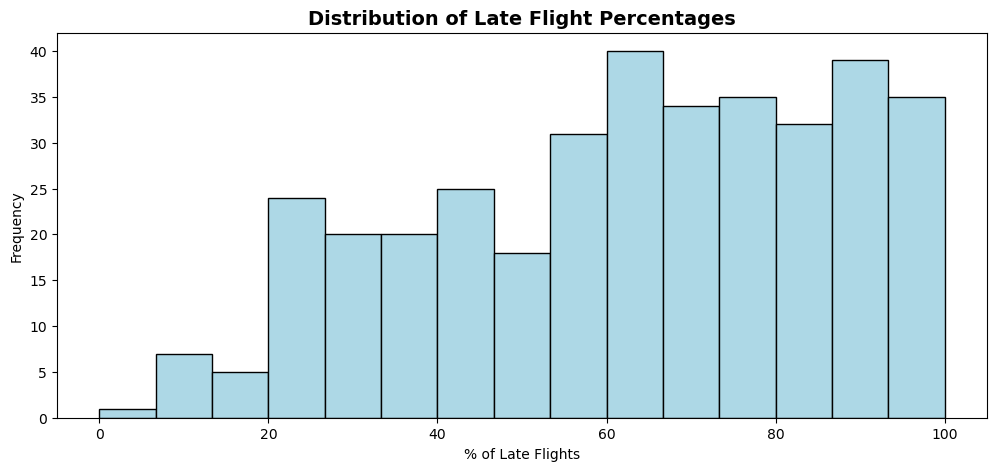

In [234]:
#Histogram for United delay percentages
plt.figure(figsize=(12, 5))
united_df['% Late Flights'].plot(kind='hist', bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of Late Flight Percentages', fontsize=14, fontweight='bold')
plt.xlabel('% of Late Flights')
plt.ylabel('Frequency')
plt.show()

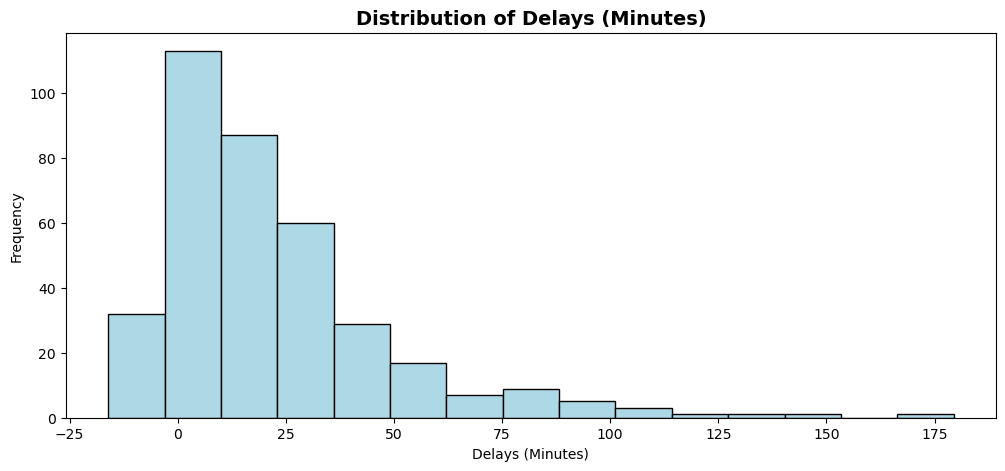

In [256]:
#Histogram for United delays
plt.figure(figsize=(12, 5))
united_df['Delay'].plot(kind='hist', bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of Delays (Minutes)', fontsize=14, fontweight='bold')
plt.xlabel('Delays (Minutes)')
plt.ylabel('Frequency')
plt.show()

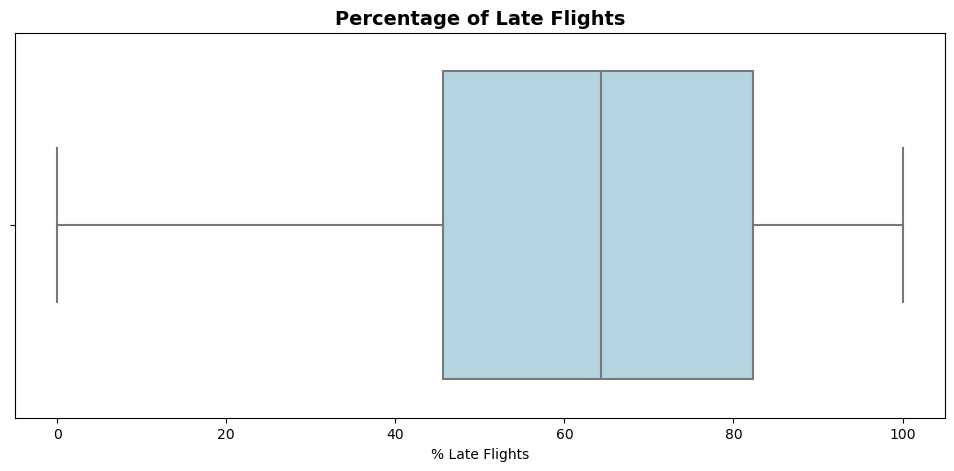

In [236]:
# Box Plot : Percentage Delays United
plt.figure(figsize=(12, 5))
sns.boxplot(x=united_df["% Late Flights"], color="lightblue")
plt.title("Percentage of Late Flights", fontsize=14, fontweight='bold')
plt.show()

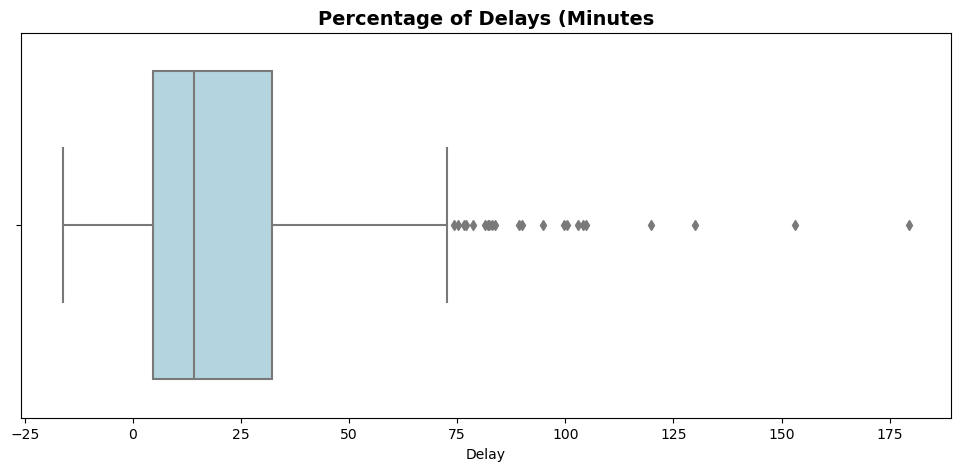

In [258]:
# Box Plot : Delays United
plt.figure(figsize=(12, 5))
sns.boxplot(x=united_df["Delay"], color="lightblue")
plt.title("Percentage of Delays (Minutes", fontsize=14, fontweight='bold')
plt.show()

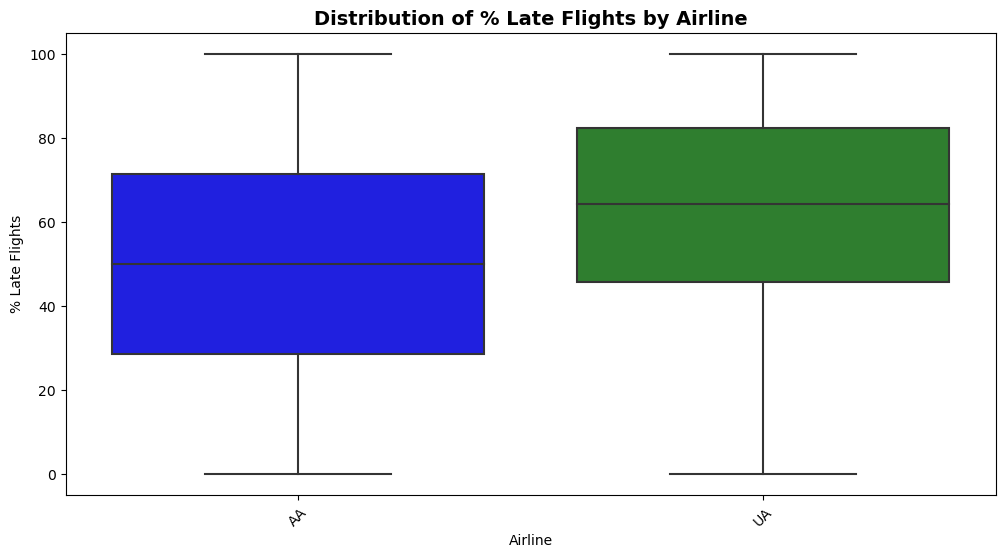

In [154]:
# United vs American
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df["Airline"], y=filtered_df["% Late Flights"], palette=["blue", "forestgreen"])
plt.xticks(rotation=45)
plt.title("Distribution of % Late Flights by Airline", fontsize=14, fontweight='bold')
plt.show()

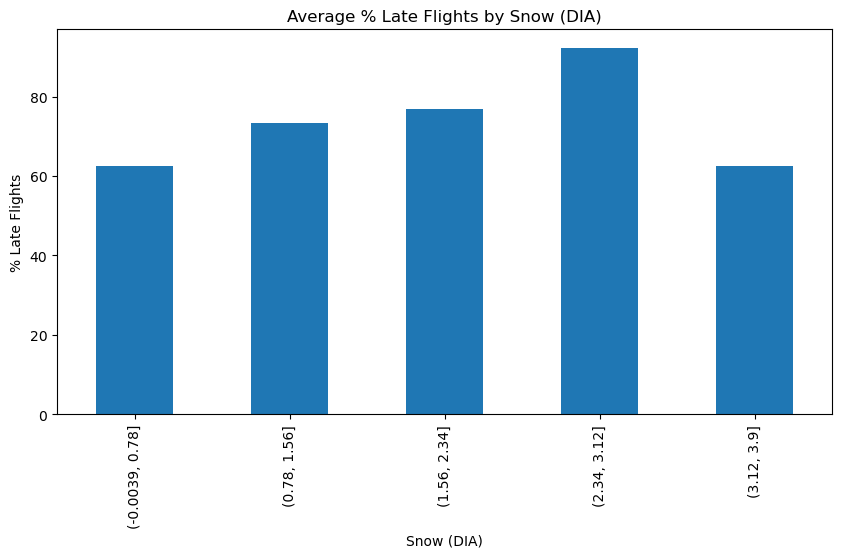

In [238]:
# United
weather_factors = ["Wind Speed (DIA)", "Visibility (DIA)", "Precipitation (DIA)", "Snow (DIA)"]
avg_delays = united_df.groupby(pd.cut(df["Snow (DIA)"], bins=5))["% Late Flights"].median()

avg_delays.plot(kind="bar", figsize=(10, 5))
plt.title("Average % Late Flights by Snow (DIA)")
plt.xlabel("Snow (DIA)")
plt.ylabel("% Late Flights")
plt.show()


In [200]:
filtered_df.columns = filtered_df.columns.str.strip()

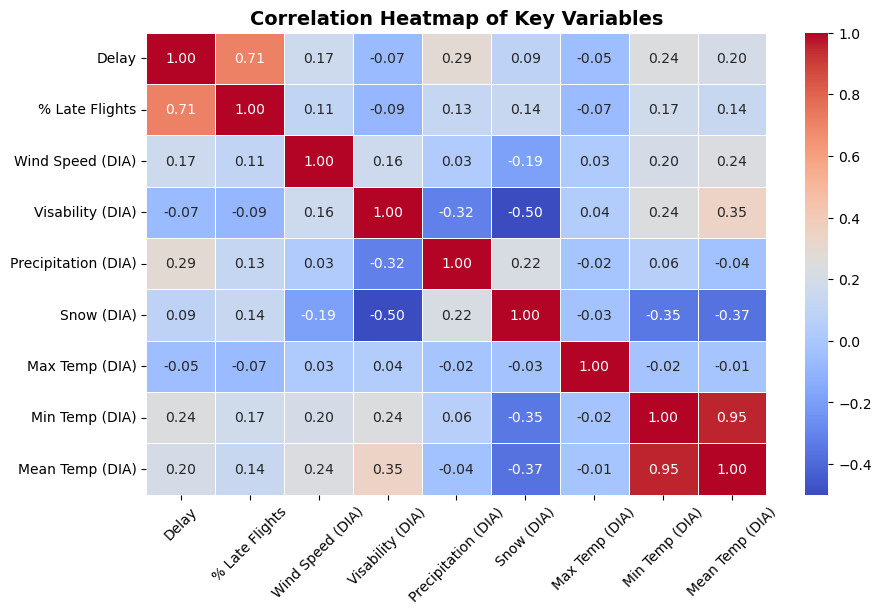

In [248]:
# Heat Map Correlation : United
selected_cols = [
    "Delay", "% Late Flights", 
    "Wind Speed (DIA)", "Visability (DIA)", "Precipitation (DIA)", "Snow (DIA)",
    "Max Temp (DIA)", "Min Temp (DIA)", "Mean Temp (DIA)"
]

hm_df = united_df[selected_cols]

# Compute correlation
corr_matrix_filtered = hm_df.corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix_filtered, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5
)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap of Key Variables", fontsize=14, fontweight='bold')
plt.show()

In [242]:
df_monthly = united_df.copy()  # Create a copy of the original DataFrame
df_monthly["Date"] = pd.to_datetime(df_monthly["Date"])  # Ensure Date is datetime
df_monthly["Month"] = df_monthly["Date"].dt.strftime("%B")  # Add Month column


In [244]:
monthly_delays = df_monthly.groupby("Month")["% Late Flights"].median().reset_index()

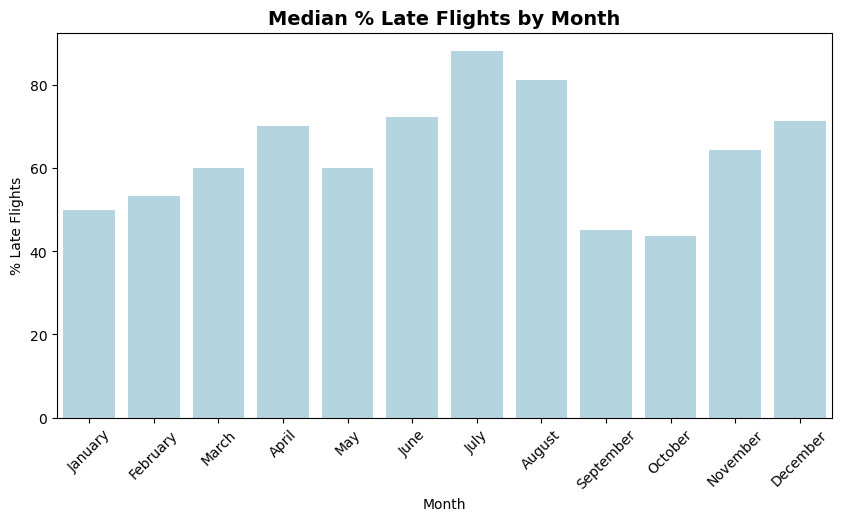

In [246]:
# Sort months in correct order : Percentage of Delays United
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_delays["Month"] = pd.Categorical(monthly_delays["Month"], categories=month_order, ordered=True)
monthly_delays = monthly_delays.sort_values("Month")

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="% Late Flights", data=monthly_delays, color="lightblue")

plt.title("Median % Late Flights by Month", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("% Late Flights")
plt.xticks(rotation=45)
plt.show()


In [344]:
filtered_df.to_excel("united_df.xlsx", index=False)  # Saves in the current directory

In [286]:
from scipy.stats import zscore


In [302]:
filtered_df["Z-Score"] = zscore(filtered_df["% Late Flights"])


In [328]:
united_df.loc[:, "Z-Score"] = zscore(united_df["% Late Flights"])


In [334]:
united_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2196 to 2561
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           366 non-null    datetime64[ns]
 1   Airline                        366 non-null    object        
 2   Destination                    366 non-null    object        
 3   Number of Flights              366 non-null    int64         
 4   Delay                          366 non-null    float64       
 5   % Late Flights                 366 non-null    float64       
 6   Dew Point (Destination)        366 non-null    float64       
 7   Dew Point (DIA)                366 non-null    float64       
 8   Pressure (Destination)         366 non-null    float64       
 9   Pressure (DIA)                 366 non-null    float64       
 10  Visibility (Destination)       366 non-null    float64       
 11  Visability (DIA)    

In [330]:
print(united_df["Z-Score"].describe())

count    3.660000e+02
mean    -3.882747e-17
std      1.001369e+00
min     -2.544187e+00
25%     -6.936093e-01
50%      6.303071e-02
75%      7.957780e-01
max      1.511485e+00
Name: Z-Score, dtype: float64


In [326]:
print(filtered_df["Z-Score"].describe())

count    732.000000
mean       0.000000
std        1.000684
min       -2.090760
25%       -0.765294
50%       -0.007884
75%        0.825267
max        1.554273
Name: Z-Score, dtype: float64


In [306]:
df_outliers = filtered_df[filtered_df["Z-Score"].abs() > 3]  # Filtering outliers


In [308]:
print(df_outliers[["Date", "% Late Flights", "Z-Score"]])  # View outliers

Empty DataFrame
Columns: [Date, % Late Flights, Z-Score]
Index: []


In [316]:
print(filtered_df["Z-Score"].max(), filtered_df["Z-Score"].min()) 

1.5542732489403086 -2.0907604587339645


In [318]:
df_outliers = filtered_df[filtered_df["Z-Score"].abs() > 2]  # Adjust to ±2 instead of ±3
print(df_outliers)

           Date Airline Destination  Number of Flights      Delay   
366  2000-01-01      AA         ORD                  5 -21.600000  \
370  2000-01-05      AA         ORD                  7 -14.571429   
381  2000-01-16      AA         ORD                  7 -19.285714   
386  2000-01-21      AA         ORD                  7 -17.142857   
391  2000-01-26      AA         ORD                  7 -16.571429   
406  2000-02-10      AA         ORD                  6 -18.166667   
408  2000-02-12      AA         ORD                  6 -11.833333   
411  2000-02-15      AA         ORD                  6 -19.833333   
417  2000-02-21      AA         ORD                  7 -11.714286   
439  2000-03-14      AA         ORD                  6  -9.166667   
457  2000-04-01      AA         ORD                  6  -9.500000   
483  2000-04-27      AA         ORD                  7 -13.571429   
499  2000-05-13      AA         ORD                  6 -10.666667   
515  2000-05-29      AA         OR

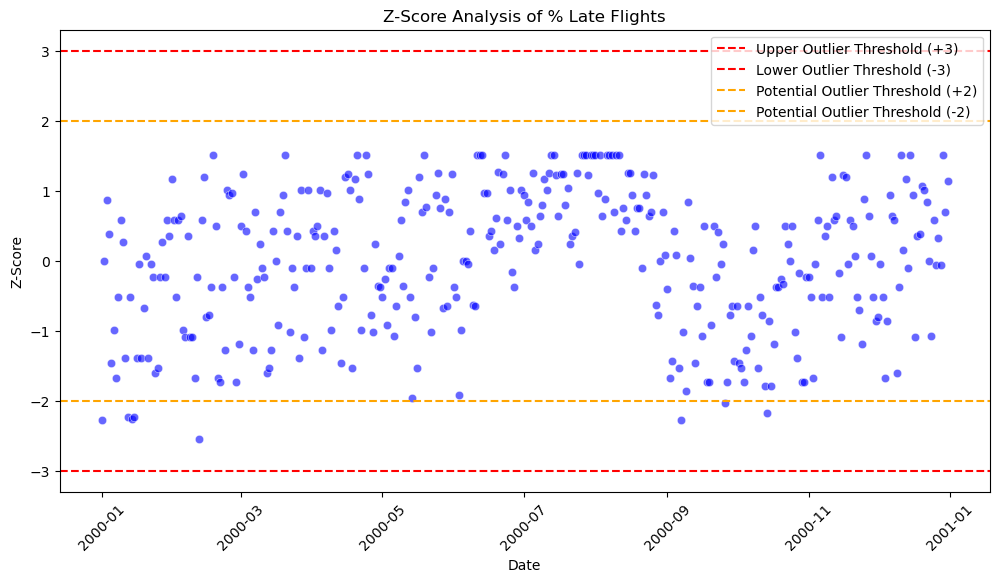

In [346]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=united_df["Date"], y=united_df["Z-Score"], color="blue", alpha=0.6)

# Add horizontal lines for outlier thresholds
plt.axhline(y=3, color="red", linestyle="--", label="Upper Outlier Threshold (+3)")
plt.axhline(y=-3, color="red", linestyle="--", label="Lower Outlier Threshold (-3)")
plt.axhline(y=2, color="orange", linestyle="--", label="Potential Outlier Threshold (+2)")
plt.axhline(y=-2, color="orange", linestyle="--", label="Potential Outlier Threshold (-2)")

plt.legend()
plt.title("Z-Score Analysis of % Late Flights")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.xticks(rotation=45)
plt.show()


In [350]:
united_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2196 to 2561
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           366 non-null    datetime64[ns]
 1   Airline                        366 non-null    object        
 2   Destination                    366 non-null    object        
 3   Number of Flights              366 non-null    int64         
 4   Delay                          366 non-null    float64       
 5   % Late Flights                 366 non-null    float64       
 6   Dew Point (Destination)        366 non-null    float64       
 7   Dew Point (DIA)                366 non-null    float64       
 8   Pressure (Destination)         366 non-null    float64       
 9   Pressure (DIA)                 366 non-null    float64       
 10  Visibility (Destination)       366 non-null    float64       
 11  Visability (DIA)    

In [352]:
united_df["Snow (DIA)"].describe()

count    366.000000
mean       0.106557
std        0.438754
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.900000
Name: Snow (DIA), dtype: float64

In [362]:
copy_df = united_df.copy()

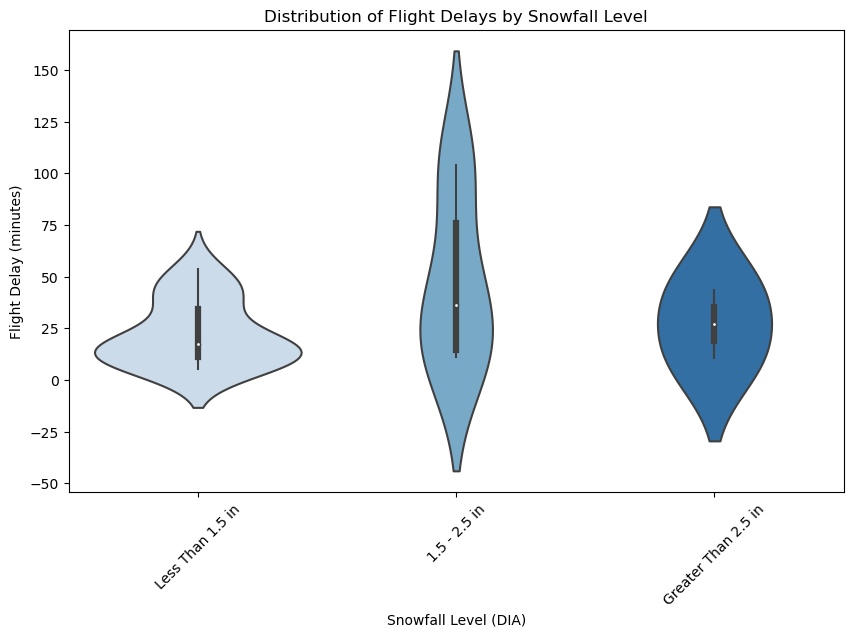

In [394]:
# Define custom bins for snowfall levels
bin_edges = [0, 1.5, 2.5, 5]  # Adjust based on data distribution
bin_labels = ["Less Than 1.5 in", "1.5 - 2.5 in", "Greater Than 2.5 in"]

copy_df["Snow Category"] = pd.cut(copy_df["Snow (DIA)"], bins=bin_edges, labels=bin_labels)

# Plot violin chart
plt.figure(figsize=(10, 6))
sns.violinplot(x="Snow Category", y="Delay", data=copy_df, palette="Blues")

plt.title("Distribution of Flight Delays by Snowfall Level")
plt.xlabel("Snowfall Level (DIA)")
plt.ylabel("Flight Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


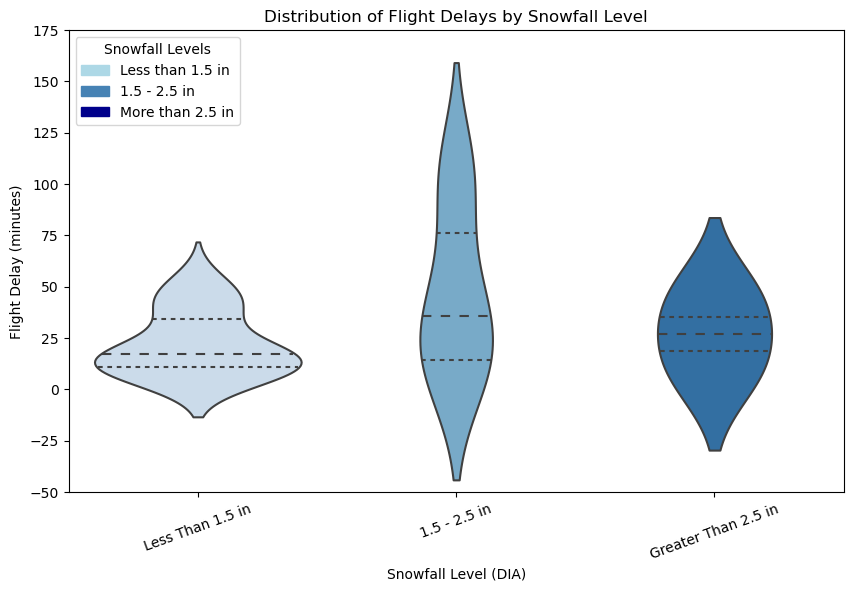

In [412]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Snow Category", y="Delay", data=copy_df, palette="Blues", inner="quartile")

plt.title("Distribution of Flight Delays by Snowfall Level")
plt.xlabel("Snowfall Level (DIA)")
plt.ylabel("Flight Delay (minutes)")
plt.xticks(rotation=20) 
plt.ylim(-50, 175) 

import matplotlib.patches as mpatches

legend_labels = [
    mpatches.Patch(color="lightblue", label="Less than 1.5 in"),
    mpatches.Patch(color="steelblue", label="1.5 - 2.5 in"),
    mpatches.Patch(color="darkblue", label="More than 2.5 in")
]

plt.legend(handles=legend_labels, title="Snowfall Levels", loc="upper left")

plt.show()
